In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate Linear Dataset

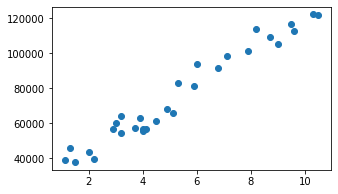

In [87]:
d_ln = pd.read_csv("linear_data.csv")
d_ln.rename(columns={'Salary': 'label'}, inplace=True)
d_ln.rename(columns={'YearsExperience' : '1'}, inplace=True)
plt.figure(figsize=(5,3))
plt.scatter(d_ln['1'], d_ln["label"])

In [92]:
d_ln.head(5)

,1,label
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Generate Non-Linear Data

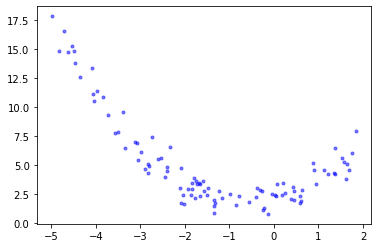

In [89]:
np.random.seed(7)
x = 7 * np.random.rand(100, 1) - 5
y = 0.8 * x**2 + 0.9*x + 2 + np.random.randn(100, 1)
raw_data = {
    "1": [item for sublist in x for item in sublist],
    "label": [item for sublist in y for item in sublist]
}
d_nl = pd.DataFrame(raw_data)

plt.plot(d_nl["1"], d_nl["label"], 'b.', alpha=0.5)

In [91]:
d_nl.head(5)

,1,label
0,-4.465842,13.739711
1,0.459432,1.991580
2,-1.931135,2.945694
3,0.064256,3.358019
4,1.845927,7.916870


# Neural Network Algorithm

To-Dos:
1. First write in function form, then generalize to a class
2. Add different types of activation functions and experiment with their differences

## Initialization

In [93]:
# initialize parameters
layers = 2
epochs = 10000
learn_rate = 0.01
num_inputs = 1

# initialize weights
def init_weights(num_inputs):
    """
        Initialize weights at random from a Gaussian distribution
        with mean 0 and standard deviation 1/m
    """

    weights_init = []
    for _ in range(layers):
        w_l = [np.random.normal(0, 1)] # weight parameters for one layer， [wl_0, wl]
        for _ in range(num_inputs):
            w_l.append(np.random.normal(0, 1/num_inputs))
        weights_init.append(w_l)
    return weights_init

weight = init_weights(num_inputs)

In [77]:
class NeuralNetwork:
    def __init__(self, layers, training_data, epochs, learn_rate, num_inputs):
        """
            layers: int; number of layers in neural nets (inp + hidden layers)
            training_data: DataFrame; raw dataset with two independent variables;
            epochs: int; number of iterations the model runs;
            num_inputs: int; number of features;
        """
        self.layers = layers
        self.training_data = training_data
        self.weights = self._init_weights(num_inputs)
        self.epochs = epochs
        self.learn_rate = learn_rate
        self.A = []

        self.label = training_data['label'].to_numpy()

    def _init_weights(self, num_inputs):
        """
            Initialize weights at random from a Gaussian distribution
            with mean 0 and standard deviation 1/m
        """
        weights = []
        for _ in range(self.layers):
            w_l = [np.random.normal(0, 1)] # weight parameters for one layer， [wl_0, wl]
            for _ in range(num_inputs):
                w_l.append(np.random.normal(0, 1/num_inputs))
            weights.append(w_l)
        print(f"Initial weights: {self.weights}")
        return weights
    
    def prepare_x(self, index):
        x = [1]
        for column_name in self.training_data.columns:
            if column_name != "label":
                x.append(self.training_data[column_name].to_numpy()[index])
        return x
    
    def sigmoid(self, Z):
        return [1.0 / (1.0 + np.exp(-z)) for z in Z]
    
    def sigmoid_deriv(self, z):
        return(self.sigmoid(z)*(1-self.sigmoid(z)))
    
    def error(self, predicted, target):
        return np.power(predicted-target, 2)
    
    def error_predicted_deriv(self, predicted, target):
        return 2*(predicted-target)
    
    
    def train_partial(self):
        #feedforward process
        for layer in range(self.layers):
            preactivation = np.multiply(np.transpose(self.weights[layer]), self.A[layer])
            activation = self.sigmoid(preactivation)
            self.A.append(activation)

        #calculate the loss (error)
        err = self.error(self.A[-1], self.label)
        partials = [err * self.sigmoid_deriv(self.A[-1])] # partial of the last layer

        for layer in np.arange(self.layers-2, -1, -1):
            partial = np.multiply(np.transpose(self.weights[layer]), partials[-1])
            partial = np.multiply(partial * self.sigmoid_deriv(self.A[layer]))
            partials.append(partial)
        
        partials = partials[::1]

        # update the weights
        for layer in range(self.layers):
            self.weights[layer] -= self.learning_rate * np.multiply(np.transpose(self.A[layer]), partials[layer])

    def train(self):
        for _ in range(self.epochs):
            length = len(self.label)
            index = np.random.randint(0, length-1)
            inp = self.prepare_x(index)
            self.A.append(inp)
            self.train_partial()
        
        return self.weights
            

        
            
    
            



In [78]:
nn = NeuralNetwork(layers=2, training_data=data, epochs=10000, learn_rate=0.01, num_inputs=1)
nn.train()

[[-1.092798041883344, -0.49480167145947485], [-0.8328071561704362, -0.466513810172211]]


ValueError: operands could not be broadcast together with shapes (2,) (100,) 

In [35]:
np.random.randint(0, 10)

1